# Caravan

## Importing Relevant Packages

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #Not necessary
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors #Not necessary

import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smf

# for test train data split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Import Datasets

In [3]:
df = pd.read_csv('Caravan.csv')

y = df.Purchase.factorize()[0]
X = df.drop('Purchase', axis=1).astype('float64') 
X_scaled = preprocessing.scale(X) #standardizes

In [4]:
attribute_array = ["MOSTYPE","MAANTHUI","MGEMOMV","MGEMLEEF","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE","MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG","MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO","MSKA","MSKB1","MSKB2","MSKC","MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART","MINKM30","MINK3045","MINK4575","MINK7512","MINK123M","MINKGEM","MKOOPKLA","PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR","PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND","AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER","AFIETS","AINBOED","ABYSTAND"]

## Visualizing the Dataset

In [5]:
yes_no = df['Purchase'].value_counts()
no = yes_no[0]
yes = yes_no[1]
yes_no_df = pd.DataFrame({'Purchased' : ['Yes', 'No'], 'Count' : [yes, no]})
yes_no_df

,Purchased,Count
0,Yes,348
1,No,5474


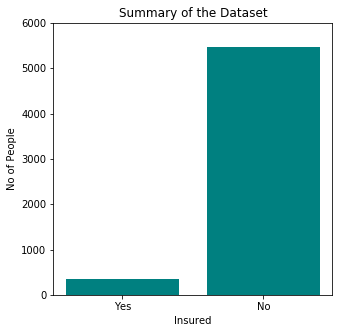

In [6]:
fig, ax = plt.subplots(figsize = (5,5 ))

ind = np.arange(2)


bars1 = ax.bar(ind, yes_no_df['Count'], 
        color = '#008080', 
        label='No of People')
ax.set_title("Summary of the Dataset")
ax.set_ylabel("No of People")
ax.set_ylim((0,6000))
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(list(yes_no_df['Purchased']))
ax.set_xlabel("Insured");

### Scatterplot for MINKGEM and MOSTYPE wrt Purchase

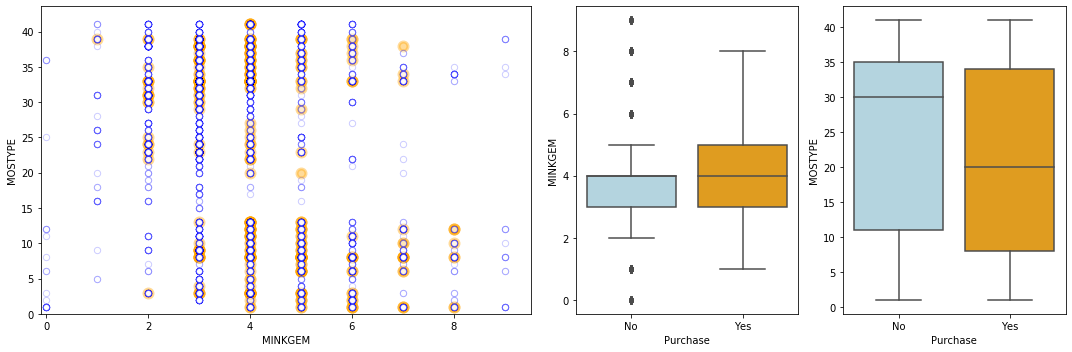

In [7]:
fig = plt.figure(figsize=(15,5))
gs = mpl.gridspec.GridSpec(1, 4) 
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

ax1.scatter(df[df.Purchase == 'Yes'].MINKGEM, df[df.Purchase == 'Yes'].MOSTYPE, s=80, c='orange', marker='o',
            linewidths=3, alpha = .4)
ax1.scatter(df[df.Purchase == 'No'].MINKGEM, df[df.Purchase == 'No'].MOSTYPE, s=40, marker='o', linewidths='1',
            edgecolors='blue', facecolors='white', alpha=.2)
#some points are overlapping. they are the darker ones.
ax1.set_ylim(bottom=0)
ax1.set_ylabel('MOSTYPE')
ax1.set_xlim(left=-0.1)
ax1.set_xlabel('MINKGEM')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('Purchase', 'MINKGEM', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Purchase', 'MOSTYPE', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

# MINKGEM: Avg Income Level, MOSTYPE: Customer Subtype (In terms of social status. Based on Keys.)
# Choice of predictors here was on judgement as there are too many predictors for all of them to be taken into account
# In the First Diagram, opacity and size of circles have been varied so that frequency of a particular point is also apparent. 
# Darker means more frequency.
# We can see wider boxplot for MOSTYPE it is categorical with huge number of levels 
# While MINKGEM is ordinal and its boxplot shows low variance and mean income level at 4 as expected by the levels

## Logistic Regression

### Division into Test and Train Data and creating dummy y values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split was run on other test_size too but no significant difference was observed
print (X_train.shape, y_train.shape) # Dimension of train data
print (X_test.shape, y_test.shape) # Dimension of test data

(4657, 86) (4657,)
(1165, 86) (1165,)


### Using Scikit-learn

#### Full Dataset

In [9]:
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train); # Fit on train dataset

In [10]:
pred = regr.predict(X_test) # Test on test dataset using predict
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                     columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True          0   1
Predicted          
0          1092  69
1             4   0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1096
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.88      0.94      0.91      1165



In [11]:
pred_p = regr.predict_proba(X_test) # Test on test dataset using predict_proba
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
cm_df.Pred.replace(to_replace={True: 1, False: 0}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, cm_df.Pred))

Pred     0   1
True          
0     1069  27
1       64   5
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1096
           1       0.16      0.07      0.10        69

    accuracy                           0.92      1165
   macro avg       0.55      0.52      0.53      1165
weighted avg       0.90      0.92      0.91      1165



### Using Statsmodels

In [12]:
X_sm = sm.add_constant(df[['MRELGE', 'MOPLHOOG', 'MOPLLAAG', 'MHHUUR']]) #Other Single Predictors: MGEMLEEF  MLR: df[[''MRELGE', 'MOPLHOOG', 'MOPLLAAG', 'MHHUUR']]
# Couldn't run on full model as the data frame turned out to be singular after add.constant
est = smf.Logit(y, np.asarray(X_sm)).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.219346
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-2.946593,0.323020,-9.122002,7.374895e-20,-3.579701,-2.313484
x1,0.113242,0.034335,3.298132,9.733029e-04,0.045946,0.180538
x2,0.062821,0.038901,1.614906,1.063310e-01,-0.013423,0.139065
x3,-0.104435,0.032253,-3.238000,1.203709e-03,-0.167650,-0.041221
x4,-0.054666,0.020835,-2.623783,8.695908e-03,-0.095501,-0.013830


## Choosing Predictors

In [13]:
# BIC gives a goodness of fit for models
# It was chosen here as it was available in est.summary2 and is considered better than AIC

bic_array = [] # To store the BIC values of every y ~ x
feature_array = [] # To store the relevant predictors only
for element in attribute_array:
    X_sm = sm.add_constant(df[[element]])
    est = smf.Logit(y, np.asarray(X_sm)).fit() # y ~ x
    bic_array.append(est.bic) # Extracts BIC value from est
    if est.bic < 2630: # Number chosen after multiple trials with the next step
        feature_array.append(element) # Lower the BIC, better the fit

Optimization terminated successfully.
         Current function value: 0.224000
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.223987
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.223700
  

c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.226120
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.225035
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.226143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.225806
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226027
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.222009
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.224354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225998
 

c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.226166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.223710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.225887
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.224895
         Iterations 7


In [14]:
print(np.var(bic_array))
print(np.std(bic_array))
print(np.mean(bic_array))
print(max(bic_array), min(bic_array))

504.0040780763908
22.45003514643999
2636.940861135553
2652.8758646161796 2511.2811716668402


In [15]:
print(feature_array)
print(len(feature_array))

['MOSTYPE', 'MOSHOOFD', 'MRELGE', 'MRELOV', 'MOPLHOOG', 'MOPLLAAG', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MINKM30', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'PPLEZIER', 'AWAPART', 'APERSAUT', 'APLEZIER']
21


## Final Model

In [16]:
X_train_smf = sm.add_constant(df[feature_array]) #Using only the chosen predictors
est = smf.Logit(y, np.asarray(X_train_smf)).fit()
est.summary2().tables[1]

         Current function value: inf
         Iterations: 35


c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\discrete\discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\users\ayushi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-7.449964e+07,3.204540e+06,-23.248151,1.485147e-119,-8.078042e+07,-6.821886e+07
x1,8.910453e-02,4.974794e-02,1.791120,7.327401e-02,-8.399630e-03,1.866087e-01
x2,-2.604175e-01,2.201467e-01,-1.182927,2.368381e-01,-6.918972e-01,1.710621e-01
x3,4.821765e-01,1.021142e-01,4.721935,2.336110e-06,2.820364e-01,6.823166e-01
x4,4.903408e-01,1.116267e-01,4.392685,1.119590e-05,2.715566e-01,7.091250e-01
x5,1.270156e-01,4.642650e-02,2.735842,6.222091e-03,3.602129e-02,2.180098e-01
x6,-1.568107e-01,4.558490e-02,-3.439969,5.817804e-04,-2.461554e-01,-6.746590e-02
x7,6.349409e-02,6.955884e-02,0.912811,3.613419e-01,-7.283874e-02,1.998269e-01
x8,8.277736e+06,3.560601e+05,23.248147,1.485278e-119,7.579872e+06,8.975601e+06
x9,8.277736e+06,3.560601e+05,23.248147,1.485278e-119,7.579872e+06,8.975601e+06


### Mathematical Form of the Model

##### Purchase = - 7.449964e+07 + 8.910453e-02*x1 - 2.604175e-01*x2 + 4.821765e-01*x3 + 4.903408e-01*x4 + 1.270156e-01*x5 - 1.568107e-01*x6 + 6.349409e-02*x7 + 8.277736e+06*x8 + 8.277736e+06*x9 + 1.866912e-01*x10 + 1.993996e-1*x11 - 9.071687e-02*x12 + 1.225503e-01*x13 + 2.147513e-01*x14 + 7.061400e-01*x15 + 3.417667e-01*x16 + 1.328430e-01*x17 - 1.646625e-01*x18 - 9.562546e-01*x19 - 9.841264e-02*x20 + 2.464923e00*x21 + error

###### Here [x1, x2, x3, ...., x21] is same as feature_array

                

### Evaluating the Model

In [17]:
X_one_train = X_train[feature_array].values.reshape(-1, len(feature_array))
X_one_test = X_test[feature_array].values.reshape(-1, len(feature_array))
regr = skl_lm.LogisticRegression()
regr.fit(X_one_train, y_train) # Fit on train data
pred = regr.predict(X_one_test) # Test on test data
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                     columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True          0   1
Predicted          
0          1092  69
1             4   0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1096
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.88      0.94      0.91      1165



In [18]:
regr.score(X_one_test, y_test)*100 # accuracy

93.73390557939915

### Mapping Probability as a function of MINKGEM

In [19]:
new_y = list(map(lambda x: 1 if(x == "Yes") else 0, y)) # f(x) = 1 if x = yes else 0
new_y = np.asarray(new_y).reshape(-1, 1) 

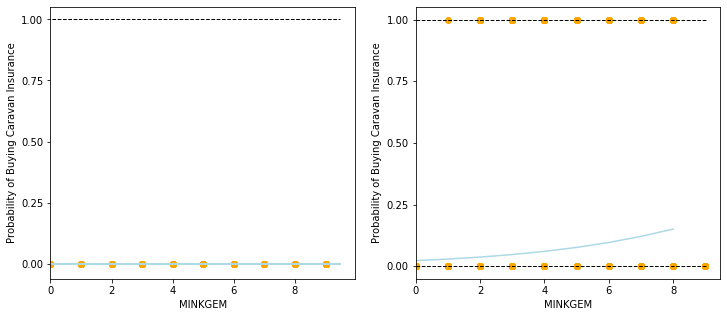

In [20]:
X_temp = df.MINKGEM.values.reshape(-1,1) 

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test_temp = np.arange(df.MINKGEM.min(), df.MINKGEM.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_temp,y)
prob = clf.predict_proba(X_test_temp)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot: Linear
sns.regplot(df.MINKGEM, new_y, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot: Polynomialish (Ideally sort of S shaped)
ax2.scatter(X_temp, y, color='orange')
ax2.plot(X_test_temp, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of Buying Caravan Insurance')
    ax.set_xlabel('MINKGEM')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(left=0)
    
# The left graph shows almost a horizontal prediction line at zero, 
# indicating prediction on the bases of MINKGEM would always yield 0
# In some cases (depending on split in test and train datasets), the line is slightly sloped

## Linear Discriminate Analysis

In [21]:
# X = df[['MOSTYPE', 'MOSHOOFD', 'MRELGE', 'MRELOV', 'MOPLHOOG', 'MOPLLAAG', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 
#         'MINKM30', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'PPLEZIER', 'AWAPART', 'APERSAUT', 
#         'APLEZIER']].as_matrix()
X_lda_train = X_train[feature_array].values.reshape(-1, len(feature_array))
X_lda_test = X_test[feature_array].values.reshape(-1, len(feature_array))
# y = df.Purchase.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
model = lda.fit(X_lda_train, y_train)
y_pred = model.predict(X_lda_test)

df_ = pd.DataFrame({'True status': y_test,
                    'Predicted status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted status','True status']).size().unstack('True status')

True status,No,Yes
Predicted status,,
No,1089,67
Yes,7,2


In [22]:
model.score(X_lda_test, y_test)*100 #accuracy

93.6480686695279

In [23]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.94      0.99      0.97      1096
         Yes       0.22      0.03      0.05        69

    accuracy                           0.94      1165
   macro avg       0.58      0.51      0.51      1165
weighted avg       0.90      0.94      0.91      1165



In [24]:
decision_prob = 0.2
y_prob_temp = lda.fit(X_lda_train, y_train)
y_prob = y_prob_temp.predict_proba(X_lda_test)

df_ = pd.DataFrame({'True insured status': y_test,
                    'Predicted insured status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted insured status','True insured status']).size().unstack('True insured status')

True insured status,No,Yes
Predicted insured status,,
No,1053,60
Yes,43,9


In [25]:
y_prob_temp.priors_ # Apriori probability of getting no and yes respectively

array([0.94009019, 0.05990981])

In [26]:
y_prob_temp.means_ # b0 for Purches = Yes or No of linerar fit

array([[2.44378712e+01, 5.81544084e+00, 6.14641389e+00, 2.30950206e+00,
        1.43238922e+00, 4.61557789e+00, 1.08177250e+00, 4.29168570e+00,
        4.71767931e+00, 6.00639561e+00, 1.98126999e+00, 2.61809045e+00,
        3.76815898e+00, 4.19735039e+00, 7.55367748e-01, 2.82594792e+00,
        1.80082229e+00, 9.59342165e-03, 3.96984925e-01, 5.33348561e-01,
        3.19780722e-03],
       [2.03261649e+01, 4.89964158e+00, 6.78136201e+00, 1.81003584e+00,
        2.02150538e+00, 3.63799283e+00, 6.48745520e-01, 3.16129032e+00,
        5.83870968e+00, 6.48387097e+00, 1.45161290e+00, 1.86379928e+00,
        4.30465950e+00, 5.11827957e+00, 1.17204301e+00, 4.81003584e+00,
        2.64157706e+00, 1.39784946e-01, 5.91397849e-01, 9.24731183e-01,
        4.30107527e-02]])

In [27]:
y_prob_temp.coef_ # b1, b2, ...., b21 of linear fit

array([[ 0.1185567 , -0.53693548,  0.20846345,  0.10858621,  0.05017007,
        -0.07516196, -0.07212481, -1.15288533, -1.11965474,  0.12059458,
         0.08727731,  0.00370417,  0.06342993,  0.09231537,  0.78888772,
         0.1861642 ,  0.15017482,  1.22779776, -1.14618778,  0.17239544,
         2.65671844]])

In [28]:
np.unique(y_prob[:,1]>0.5, return_counts=True) # Predictions of yes or no based on probability 

(array([False,  True]), array([1156,    9]))

In [29]:
np.unique(y_prob[:,1]>0.9, return_counts=True) # Same prediction but higher threshold

(array([False,  True]), array([1159,    6]))

###### Final Considerations:

In [30]:
# We could not run confounding the categorical variables had multiple levels

# The model shows the following factors affect the buying of insurance policy:
#     purchasing power class
#     income and income levels
#     education levels
#     house types
#     family types
#     policies in car, boat, fire and 3rd party